In [1]:
import pandas as pd

customers = pd.read_csv("customers.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")
order_items = pd.read_csv("order_items.csv")
delivery = pd.read_csv("delivery.csv")

print("SpeedyCart datasets loaded successfully")


SpeedyCart datasets loaded successfully


In [2]:
customers.head()


,customer_id,customer_name,city,age_group,gender,membership_type,signup_date
0,C001,Rahul Sharma,Hyderabad,25-34,Male,Premium,2023-01-15
1,C002,Anjali Rao,Bangalore,18-24,Female,Regular,2023-02-10
2,C003,Amit Verma,Delhi,35-44,Male,Premium,2023-03-05
3,C004,Priya Singh,Mumbai,25-34,Female,Regular,2023-03-18
4,C005,Suresh Kumar,Chennai,45-54,Male,Regular,2023-04-02


In [3]:
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      8 non-null      object
 1   customer_name    8 non-null      object
 2   city             8 non-null      object
 3   age_group        8 non-null      object
 4   gender           8 non-null      object
 5   membership_type  8 non-null      object
 6   signup_date      8 non-null      object
dtypes: object(7)
memory usage: 576.0+ bytes


In [4]:
orders.head()

,order_id,customer_id,order_date,order_value,payment_mode,city
0,O1001,C001,2023-06-01,420,UPI,Hyderabad
1,O1002,C002,2023-06-02,180,Credit Card,Bangalore
2,O1003,C003,2023-06-03,560,Debit Card,Delhi
3,O1004,C004,2023-06-05,240,UPI,Mumbai
4,O1005,C001,2023-06-07,310,Wallet,Hyderabad


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      10 non-null     object
 1   customer_id   10 non-null     object
 2   order_date    10 non-null     object
 3   order_value   10 non-null     int64 
 4   payment_mode  10 non-null     object
 5   city          10 non-null     object
dtypes: int64(1), object(5)
memory usage: 608.0+ bytes


In [6]:
delivery.head()


,order_id,delivery_partner,delivery_time_minutes,delivery_rating,delay_status
0,O1001,Ravi,18,5,On Time
1,O1002,Suresh,25,4,Delayed
2,O1003,Anil,20,5,On Time
3,O1004,Manoj,30,3,Delayed
4,O1005,Ravi,16,5,On Time


In [7]:
orders['order_date'] = pd.to_datetime(orders['order_date'])


In [8]:
orders.dtypes


order_id                object
customer_id             object
order_date      datetime64[ns]
order_value              int64
payment_mode            object
city                    object
dtype: object

In [9]:
orders['order_value'].sum()


np.int64(3560)

In [10]:
orders['order_id'].nunique()


10

In [11]:
orders.groupby('city')['order_id'].count().sort_values(ascending=False)


city
Hyderabad    3
Delhi        2
Ahmedabad    1
Chennai      1
Bangalore    1
Mumbai       1
Pune         1
Name: order_id, dtype: int64

In [12]:
delivery['delivery_time_minutes'].mean()


np.float64(23.0)

In [13]:
delivery['delay_status'].value_counts()


delay_status
On Time    6
Delayed    4
Name: count, dtype: int64

In [14]:
orders_delivery = pd.merge(orders, delivery, on='order_id')
orders_delivery.head()


,order_id,customer_id,order_date,order_value,payment_mode,city,delivery_partner,delivery_time_minutes,delivery_rating,delay_status
0,O1001,C001,2023-06-01,420,UPI,Hyderabad,Ravi,18,5,On Time
1,O1002,C002,2023-06-02,180,Credit Card,Bangalore,Suresh,25,4,Delayed
2,O1003,C003,2023-06-03,560,Debit Card,Delhi,Anil,20,5,On Time
3,O1004,C004,2023-06-05,240,UPI,Mumbai,Manoj,30,3,Delayed
4,O1005,C001,2023-06-07,310,Wallet,Hyderabad,Ravi,16,5,On Time


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


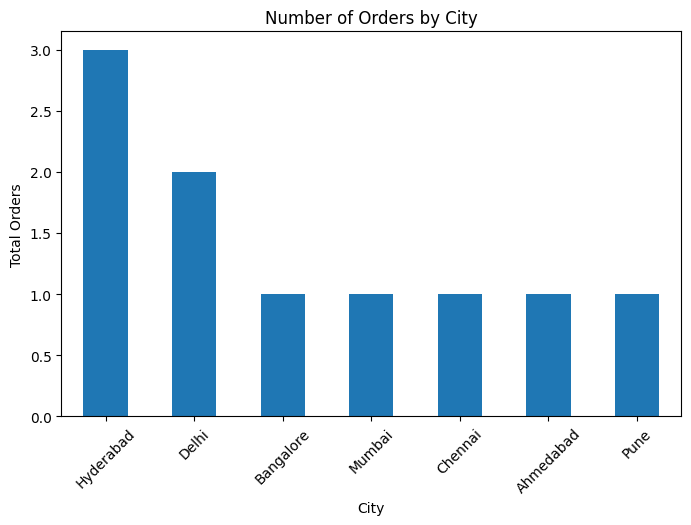

In [17]:
orders_by_city = orders_delivery['city'].value_counts()

plt.figure(figsize=(8,5))
orders_by_city.plot(kind='bar')
plt.title("Number of Orders by City")
plt.xlabel("City")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)
plt.show()


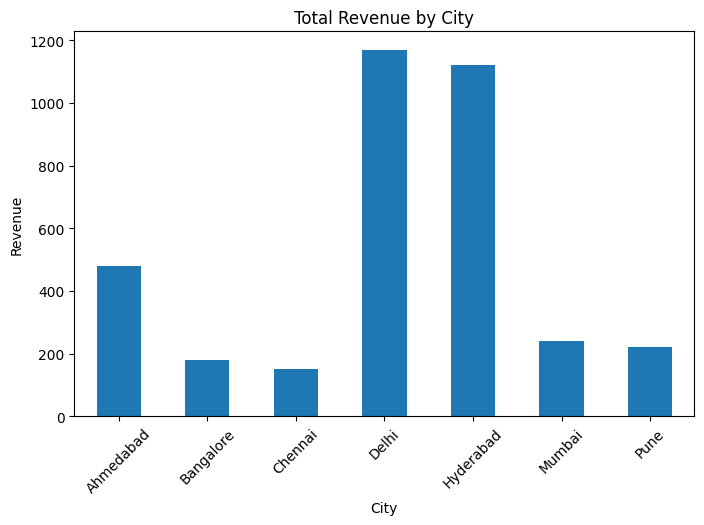

In [18]:
revenue_by_city = orders_delivery.groupby('city')['order_value'].sum()

plt.figure(figsize=(8,5))
revenue_by_city.plot(kind='bar')
plt.title("Total Revenue by City")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


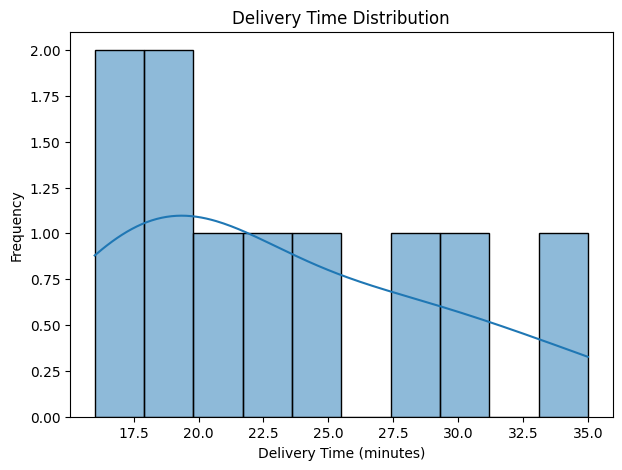

In [19]:
plt.figure(figsize=(7,5))
sns.histplot(orders_delivery['delivery_time_minutes'], bins=10, kde=True)
plt.title("Delivery Time Distribution")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.show()


In [21]:
orders_delivery['is_delayed'] = orders_delivery['delivery_time_minutes'] > 20


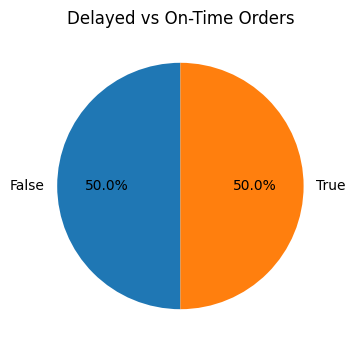

In [23]:
delay_counts = orders_delivery['is_delayed'].value_counts()

plt.figure(figsize=(6,4))
delay_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Delayed vs On-Time Orders")
plt.ylabel("")
plt.show()



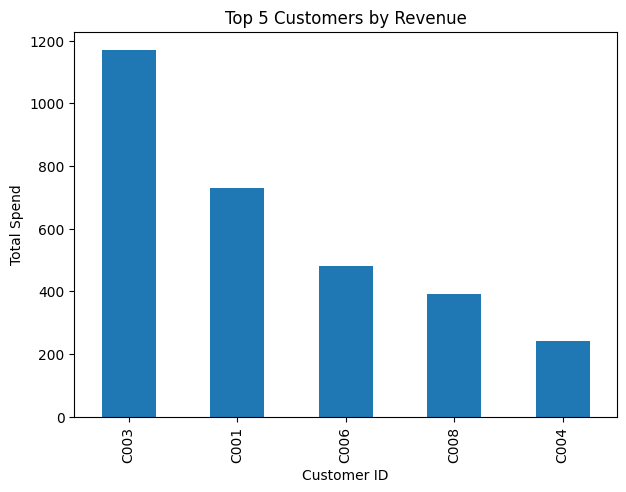

In [24]:
top_customers = (
    orders_delivery.groupby('customer_id')['order_value']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

plt.figure(figsize=(7,5))
top_customers.plot(kind='bar')
plt.title("Top 5 Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Total Spend")
plt.show()


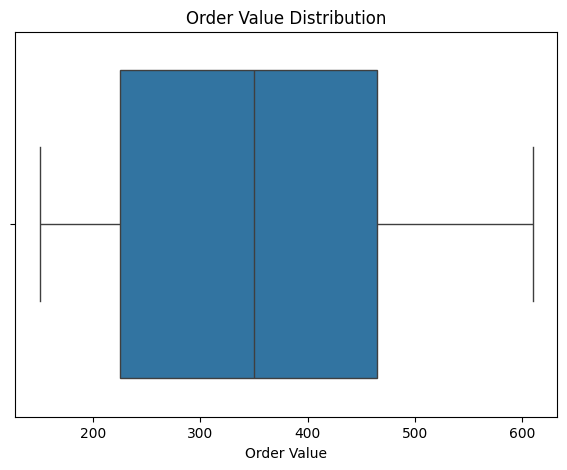

In [25]:
plt.figure(figsize=(7,5))
sns.boxplot(x=orders_delivery['order_value'])
plt.title("Order Value Distribution")
plt.xlabel("Order Value")
plt.show()


In [26]:
orders_delivery


,order_id,customer_id,order_date,order_value,payment_mode,city,delivery_partner,delivery_time_minutes,delivery_rating,delay_status,is_delayed
0,O1001,C001,2023-06-01,420,UPI,Hyderabad,Ravi,18,5,On Time,False
1,O1002,C002,2023-06-02,180,Credit Card,Bangalore,Suresh,25,4,Delayed,True
2,O1003,C003,2023-06-03,560,Debit Card,Delhi,Anil,20,5,On Time,False
3,O1004,C004,2023-06-05,240,UPI,Mumbai,Manoj,30,3,Delayed,True
4,O1005,C001,2023-06-07,310,Wallet,Hyderabad,Ravi,16,5,On Time,False
5,O1006,C005,2023-06-08,150,Cash,Chennai,Karthik,22,4,On Time,True
6,O1007,C006,2023-06-09,480,Credit Card,Ahmedabad,Suresh,28,3,Delayed,True
7,O1008,C007,2023-06-10,220,UPI,Pune,Anil,19,5,On Time,False
8,O1009,C008,2023-06-11,390,Debit Card,Hyderabad,Ravi,17,5,On Time,False
9,O1010,C003,2023-06-12,610,Credit Card,Delhi,Manoj,35,2,Delayed,True


In [27]:
orders_delivery.info()
orders_delivery.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id               10 non-null     object        
 1   customer_id            10 non-null     object        
 2   order_date             10 non-null     datetime64[ns]
 3   order_value            10 non-null     int64         
 4   payment_mode           10 non-null     object        
 5   city                   10 non-null     object        
 6   delivery_partner       10 non-null     object        
 7   delivery_time_minutes  10 non-null     int64         
 8   delivery_rating        10 non-null     int64         
 9   delay_status           10 non-null     object        
 10  is_delayed             10 non-null     bool          
dtypes: bool(1), datetime64[ns](1), int64(3), object(6)
memory usage: 938.0+ bytes


,order_id,customer_id,order_date,order_value,payment_mode,city,delivery_partner,delivery_time_minutes,delivery_rating,delay_status,is_delayed
0,O1001,C001,2023-06-01,420,UPI,Hyderabad,Ravi,18,5,On Time,False
1,O1002,C002,2023-06-02,180,Credit Card,Bangalore,Suresh,25,4,Delayed,True
2,O1003,C003,2023-06-03,560,Debit Card,Delhi,Anil,20,5,On Time,False
3,O1004,C004,2023-06-05,240,UPI,Mumbai,Manoj,30,3,Delayed,True
4,O1005,C001,2023-06-07,310,Wallet,Hyderabad,Ravi,16,5,On Time,False


In [28]:
orders_delivery.columns = [
    col.lower().strip().replace(" ", "_")
    for col in orders_delivery.columns
]


In [29]:
orders_delivery.columns


Index(['order_id', 'customer_id', 'order_date', 'order_value', 'payment_mode',
       'city', 'delivery_partner', 'delivery_time_minutes', 'delivery_rating',
       'delay_status', 'is_delayed'],
      dtype='object')

In [30]:
orders_delivery.to_csv(
    "orders_delivery_cleaned.csv",
    index=False
)
